<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.175018,54.192524,-47.266116,116.101425,143.416667,-27.315242
1,0.0,1.0,70.802324,60.058809,104.573094,245.434226,130.839790,114.594436
2,0.0,2.0,64.227087,30.336585,-11.687075,92.876597,100.279263,-7.402665
3,0.0,3.0,97.450682,59.377683,78.453351,245.281715,146.947189,98.334526
4,0.0,4.0,90.256756,69.932735,-188.443961,-18.254470,151.823609,-170.078079
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.888613,93.268494,-171.454950,-23.297843,142.341381,-165.639224
249996,999.0,246.0,20.664503,69.838588,78.607229,179.110321,71.551049,107.559272
249997,999.0,247.0,46.603900,65.058898,-217.360584,-95.697785,109.859422,-205.557207
249998,999.0,248.0,57.831776,55.566613,12.273903,135.672292,117.122515,18.549777


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.175018,54.192524,-47.266116,116.101425,143.416667,-27.315242
1,0.0,1.0,70.802324,60.058809,104.573094,245.434226,130.839790,114.594436
2,0.0,2.0,64.227087,30.336585,-11.687075,92.876597,100.279263,-7.402665
3,0.0,3.0,97.450682,59.377683,78.453351,245.281715,146.947189,98.334526
4,0.0,4.0,90.256756,69.932735,-188.443961,-18.254470,151.823609,-170.078079
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.888613,93.268494,-171.454950,-23.297843,142.341381,-165.639224
249996,999.0,246.0,20.664503,69.838588,78.607229,179.110321,71.551049,107.559272
249997,999.0,247.0,46.603900,65.058898,-217.360584,-95.697785,109.859422,-205.557207
249998,999.0,248.0,57.831776,55.566613,12.273903,135.672292,117.122515,18.549777


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    99.175018  54.192524  -47.266116  116.101425  143.416667   
      1.0    70.802324  60.058809  104.573094  245.434226  130.839790   
      2.0    64.227087  30.336585  -11.687075   92.876597  100.279263   
      3.0    97.450682  59.377683   78.453351  245.281715  146.947189   
      4.0    90.256756  69.932735 -188.443961  -18.254470  151.823609   
...                ...        ...         ...         ...         ...   
999.0 245.0  44.888613  93.268494 -171.454950  -23.297843  142.341381   
      246.0  20.664503  69.838588   78.607229  179.110321   71.551049   
      247.0  46.603900  65.058898 -217.360584  -95.697785  109.859422   
      248.0  57.831776  55.566613   12.273903  135.672292  117.122515   
      249.0  82.996507  49.483327   29.368719  171.848553  152.471219   

                  e_hat  
rep   index              
0.0   0.0    -27.315242  
      1.0    114.594436  
      2.0     -7.402665  
      3.0     98.334526  
      4.0   -170.078079  
...                 ...  
999.0 245.0 -165.639224  
      246.0  107.559272  
      247.0 -205.557207  
      248.0   18.549777  
      249.0   19.377334  

[250000 rows x 6 columns]

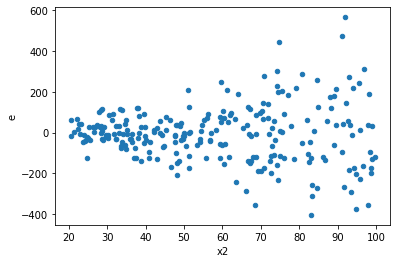

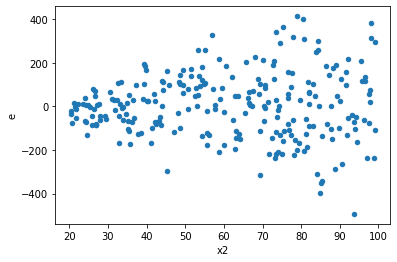

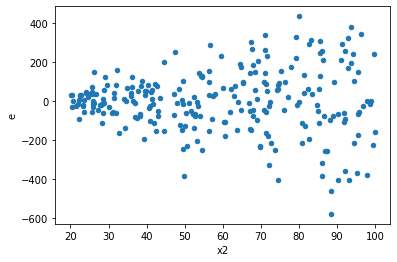

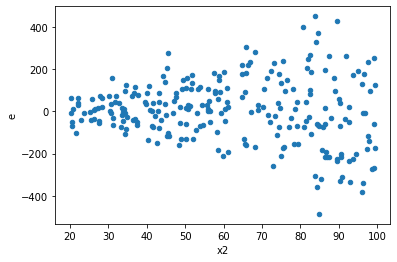

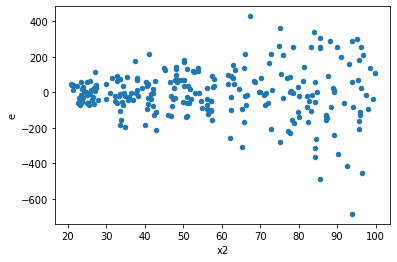

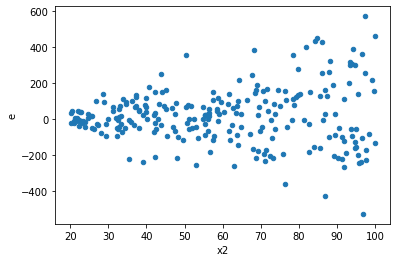

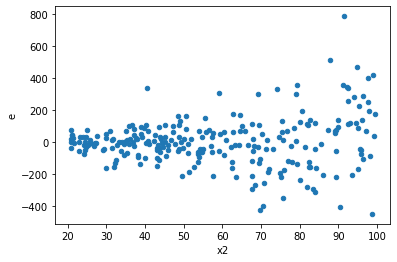

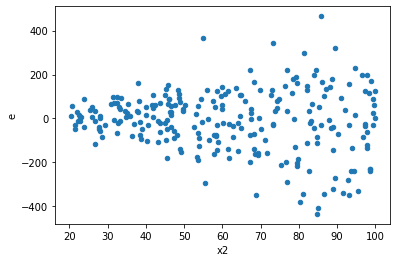

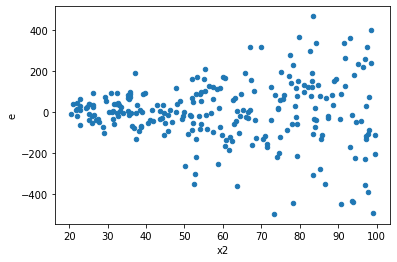

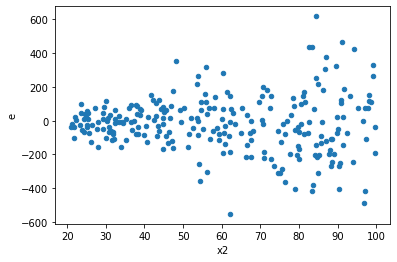

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,127.0,119.0,1580821.4058698665,3894228.0650710682,12447.412644644619,32724.605588832506,2.6290287405963,1.7904760674092302e-07,0.9999999104761966,8.952380337046151e-08,Reject001=0 : Heteroscedasticity
2.0,125.0,121.0,3015818.5199669357,3227667.499813933,24126.548159735485,26674.93801499118,1.1056259618401887,0.5793329042812689,0.7103335478593655,0.28966645214063447,Reject001=1 : Homoscedasticity
3.0,129.0,117.0,1051538.6944737923,4103783.913890804,8151.462747858855,35075.07618710089,4.3029180494401515,1.8207657603852567e-14,0.9999999999999909,9.103828801926284e-15,Reject001=0 : Heteroscedasticity
5.0,133.0,113.0,1380236.4704303562,4601505.536517844,10377.717822784633,40721.287933786225,3.923915511017389,8.597567102697212e-13,0.9999999999995701,4.298783551348606e-13,Reject001=0 : Heteroscedasticity
12.0,98.0,148.0,806691.6707071089,5776299.456924171,8231.547660276621,39029.05038462278,4.741398822601388,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,136.0,110.0,1428865.9869615964,4834653.247714052,10506.367551188208,43951.39316103684,4.183310068575146,1.3367085216486885e-13,0.9999999999999332,6.683542608243442e-14,Reject001=0 : Heteroscedasticity
14.0,140.0,106.0,2964661.27332708,4973506.794267375,21176.151952336288,46919.87541761674,2.2156941224838653,2.4137921007527652e-05,0.9999879310394962,1.2068960503763826e-05,Reject001=0 : Heteroscedasticity
15.0,116.0,130.0,1437684.7555720164,3922898.146427564,12393.834099758762,30176.139587904338,2.434770333781674,1.0503494765057297e-06,0.9999994748252617,5.251747382528649e-07,Reject001=0 : Heteroscedasticity
17.0,129.0,117.0,1976765.501442179,3558409.09256602,15323.763577071155,30413.7529279147,1.984744333527998,0.00019161737580875027,0.9999041913120956,9.580868790437513e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,121.0,125.0,3732508.0996178943,890804.2588034626,30847.17437700739,7126.434070427701,0.23102388514844144,8.809428662479004e-15,Reject001=0 : Heteroscedasticity
1.0,127.0,119.0,1580821.4058698665,3894228.0650710682,12447.412644644619,32724.605588832506,2.6290287405963,1.7904760674092302e-07,Reject001=0 : Heteroscedasticity
2.0,125.0,121.0,3015818.5199669357,3227667.499813933,24126.548159735485,26674.93801499118,1.1056259618401887,0.5793329042812689,Reject001=1 : Homoscedasticity
3.0,129.0,117.0,1051538.6944737923,4103783.913890804,8151.462747858855,35075.07618710089,4.3029180494401515,1.8207657603852567e-14,Reject001=0 : Heteroscedasticity
4.0,133.0,113.0,3853304.081706782,1122701.7491196769,28972.211140652496,9935.413709023689,0.34292907989624466,4.736191665046282e-09,Reject001=0 : Heteroscedasticity
5.0,133.0,113.0,1380236.4704303562,4601505.536517844,10377.717822784633,40721.287933786225,3.923915511017389,8.597567102697212e-13,Reject001=0 : Heteroscedasticity
6.0,106.0,140.0,4343091.443187724,1291779.3008574776,40972.56078478985,9226.99500612484,0.22519937317538025,3.004749388372443e-14,Reject001=0 : Heteroscedasticity
7.0,117.0,129.0,2266625.401335698,2428219.826401125,19372.86667808289,18823.409506985467,0.9716377973261416,0.875988553116678,Reject001=1 : Homoscedasticity
8.0,145.0,101.0,5115929.826807999,770502.8318788089,35282.27466764137,7628.740909691177,0.2162202120343382,7.726750844306316e-17,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    828
Reject001=1 : Homoscedasticity      172
Name: Result_test, dtype: int64